Results from replication of ITU study on breastdata

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
current_directory = os.environ['HOME']
model_name_ImgNet = "Mei_repli_ResNet50_ImgNet"
model_name_RadNet = "Mei_repli_ResNet50_RadNet"
lr = 0.0001 
image_size = 256

# Training summary:

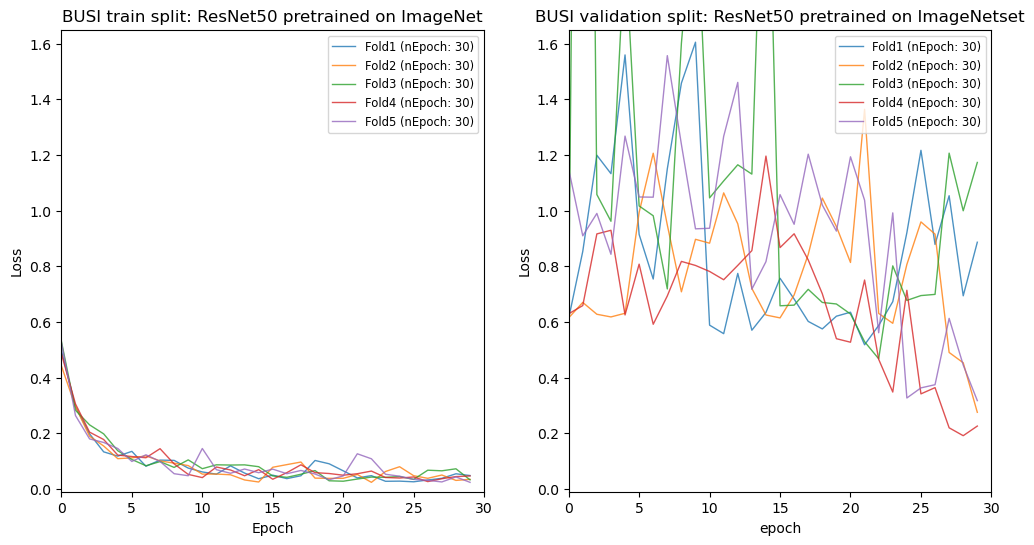

/scratch/usertmp/ipykernel_1082768/1858548738.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


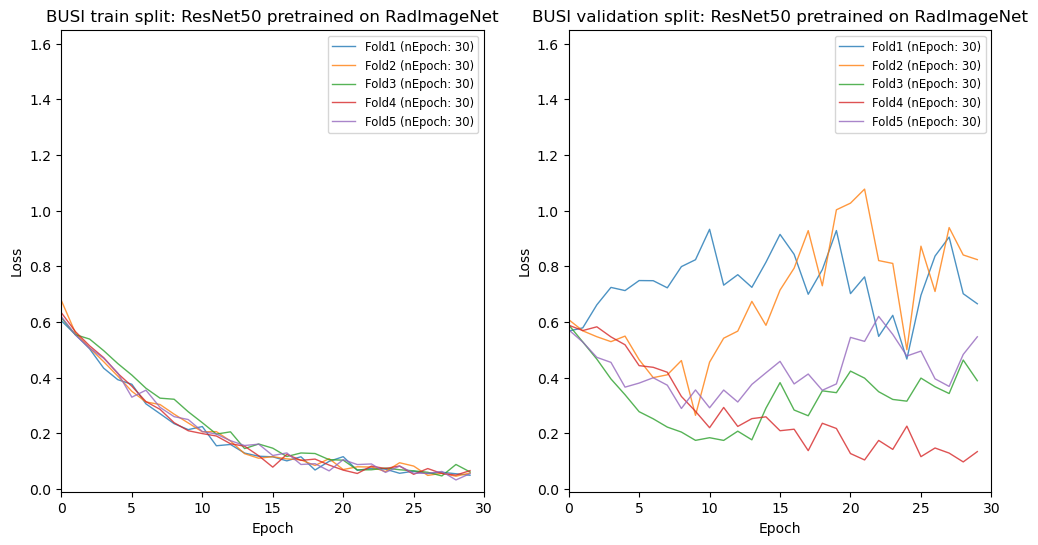

In [33]:
#Mei:
_xlim = [0,30]
_ylim = [-0.01,1.65]

#ImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_ImageNet/training_history/breast-fold" + str(i+1) + "-" + model_name_ImgNet + "-"+str(lr)+ ".csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

#Train
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_aucs[i])
        ax1.plot(
            train_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on ImageNet',
    )
ax1.legend(loc="upper right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax2.plot(
            val_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on ImageNetset',
    )
ax2.legend(loc="upper right",fontsize='small')
plt.show()

#RadImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_RadNet/training_history/breast-fold" + str(i+1) + "-" + model_name_RadNet + "-"+str(lr)+ ".csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])
ax2 = fig.add_subplot(122)

#Train:
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on RadImageNet',
    )
ax1.legend(loc="upper right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on RadImageNet',
    )
ax2.legend(loc="upper right",fontsize='small')
plt.show()

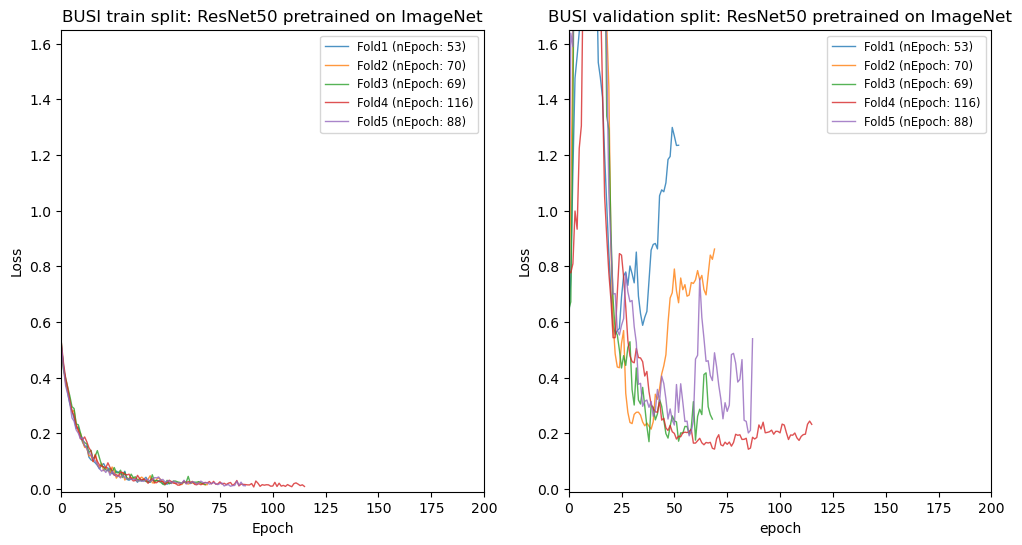

/scratch/usertmp/ipykernel_1082768/2859483809.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


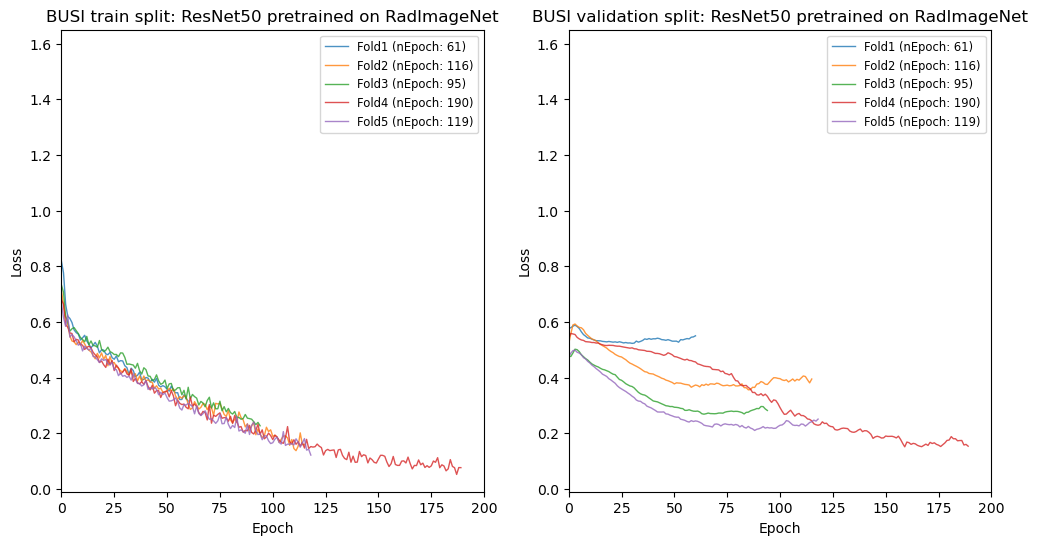

In [32]:
#ITU
_xlim = [0,200]
_ylim = [-0.01,1.65]

#ImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/ITU/freezing_round2/pretrained_ImageNet/training_history/breast-unfreezeall-fold" + str(i+1) + "-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

#Train
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on ImageNet',
    )
ax1.legend(loc="upper right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on ImageNet',
    )
ax2.legend(loc="upper right",fontsize='small')
plt.show()

#RadImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/ITU/freezing_round2/pretrained_RadImageNet/training_history/breast-unfreezeall-fold" + str(i+1) + "-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])
ax2 = fig.add_subplot(122)

#Train:
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on RadImageNet',
    )
ax1.legend(loc="upper right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            label=r"Fold%i (nEpoch: %i)" % (i+1, epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on RadImageNet',
    )
ax2.legend(loc="upper right",fontsize='small')
plt.show()

More plots of the training can be found under the Mei and ITU folder